# Time series utilities

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Testing data

In [ ]:
dt1 = [123, 112, 118, 104, 105, 107, 114, 119, 123, 127, 132, 144]
dt2 = [145, 157, 162, 170, 173]
dt3 = [148, 152, 163, 170, 174]

idx = pd.DatetimeIndex(['2020-01-01', '2020-01-02','2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12'])
ts1 = pd.Series(data = dt1, index=idx)
idxs = [0, 4, 6, 7, 12, 15, 18]
ts2 = pd.Series(data=dt1, index=range(len(dt1)))
ts3 = pd.Series(data=dt2, index=range(len(dt2)))

df = pd.DataFrame({'ts1' : ts2*2, 'ts2' : ts2})
df

## Transform an asc list of indexes in a binary array

In [ ]:
def idx2bin_array(idxs, last=0):
    if(last==0): last = idxs[-1]
    binArray = [ 1 if i in idxs else 0 for i in range(0, last+1) ]
    return(binArray)

In [ ]:
ba = idx2bin_array(idxs); ba

## Time series to Dataframe with column of indexes

In [ ]:
def ts2df_idxed(ts):
      idx = np.arange(0, len(ts))
      df = pd.DataFrame(idx,ts)
      df.set_index(idx)
      return df

In [ ]:
df = ts2df_idxed(ts1); df

## Padding

In [ ]:
def pad(ts, n, left=True):
    idxs = range(-n, ts.shape[0])
    if left:
        idxs = range(ts.shape[0] + n)
    ts_padded = ts.reindex(idxs)
    pd.Series.fillna(ts_padded, 0, inplace=True)
    return ts_padded

In [ ]:
ts2_pr = pad(ts2, 2, False)     
ts2_pl = pad(ts2, 2, True)     
print('Original\n')
print(ts2)
print('Padded right\n')
print(ts2_pr)
print('Padded left\n')
print(ts2_pl)

## Plotting

In [ ]:
df = pd.DataFrame({'ts1' : ts2*2, 'ts2' : ts2})

df.plot()

## Plot forecast

In [ ]:
ts_hist=ts2
fcst=dt2
plt.plot(ts2)
idx = index=range(len(ts_hist), len(hist)+len(fcst))
idx
ts_fcst = pd.Series(data=fcst, index=idx)

In [ ]:
plt.plot(ts_fcst)

In [ ]:
def gen_ts_fcst(ts_hist, fcst):
    idx = index=range(len(ts_hist), len(ts_hist)+len(fcst))
    return pd.Series(data=fcst, index=idx)

In [ ]:
ts_hist=ts2
fcst=dt2

gen_ts_fcst(ts_hist, fcst)

In [ ]:
def plot_fcst(ts_hist, ts_fcst):
    tot = list(ts_hist) + list(ts_fcst)
    plt.plot(tot, color='r')
    plt.plot(hist, color='b')
    plt.show()

In [ ]:
ts_hist=ts2
fcst=dt2

plot_fcst(ts_hist, ts_fcst)

In [195]:
def plot_fcst_valid(train, test, fcst):
    train_plus = add_value(train, test[0])
    nH = len(train_plus)
    nF = len(fcst)
    histIdx = range(len(train_plus))
    fcstIdx = range(len(train), len(train)+len(fcst))
    plt.figure()
    plt.plot(histIdx, train_plus, label='Train', Color='b', lw=1.)
    plt.plot(fcstIdx, test, label='Test', Color='g', lw=1.)
    plt.plot(fcstIdx, fcst, label='Fcst', Color='r', lw=1.)
    plt.legend(loc='best')
    plt.show()

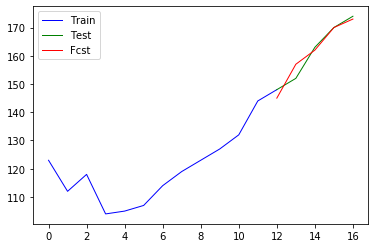

In [196]:
train = ts2
test = dt3

plot_fcst_valid(train,test,fcst)

In [189]:
def add_value(ts, val):
    idxs = range(ts.shape[0]+1)
    ts = ts.reindex(idxs) 
    ts[len(ts_train)-1] = val
    return ts

In [192]:
ts = ts2
print(ts, '\n')
ts = add_value(ts, 7)
print(ts)

0     123
1     112
2     118
3     104
4     105
5     107
6     114
7     119
8     123
9     127
10    132
11    144
dtype: int64 

0     123.0
1     112.0
2     118.0
3     104.0
4     105.0
5     107.0
6     114.0
7     119.0
8     123.0
9     127.0
10    132.0
11    144.0
12      7.0
dtype: float64
